In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from lstm_full_model import FullLstmPipeline
from evaluation import ModelSelector
from evaluation import ModelEvaluation

2024-02-28 20:08:03.270664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_config = {
    'target_column': 'anomaly',
    'n_steps' : 5,
    'num_splits' : 34,
    'th' : 0.92
    }

In [4]:
selector = ModelSelector(model_config,FullLstmPipeline,min_splits=33,max_splits=34)

In [5]:
res = selector.select_best(f1_th=0.5)

Run model number 33
36/36 [==============================] - 0s 2ms/step
X.shape:  (1149, 33)
35/35 [==============================] - 0s 2ms/step
X.shape:  (1089, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1149, 33)
35/35 [==============================] - 0s 2ms/step
X.shape:  (1090, 33)
36/36 [==============================] - 0s 3ms/step
X.shape:  (1142, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1140, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1143, 33)
34/34 [==============================] - 0s 4ms/step
X.shape:  (1070, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1145, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1134, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1141, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1136, 33)
36/36 [==============================] - 0s 2ms/step
X.shape:  (1135, 33)
36/36 [===========

,f1,mar,far
model_33,0.000000,1.000000,0.000000
model_34,0.537600,0.494500,0.425800


,f1,mar,far
model_34,0.537600,0.494500,0.425800


In [6]:
base_preds = pd.read_csv('../data/lstm_baseline_predictions.csv')['y_pred']

In [7]:
eval_config = {
    'baseline' : {
        'y_test' :res['model'].y_test,
        'y_pred': base_preds.values,
        'th': 0.5
    },
    
    res['model_name'] : {
        'y_test' :res['model'].y_test,
        'y_pred':res['predictions'].values,
        'th' : 0.35
    }
}

In [8]:
eval = ModelEvaluation(eval_config=eval_config)

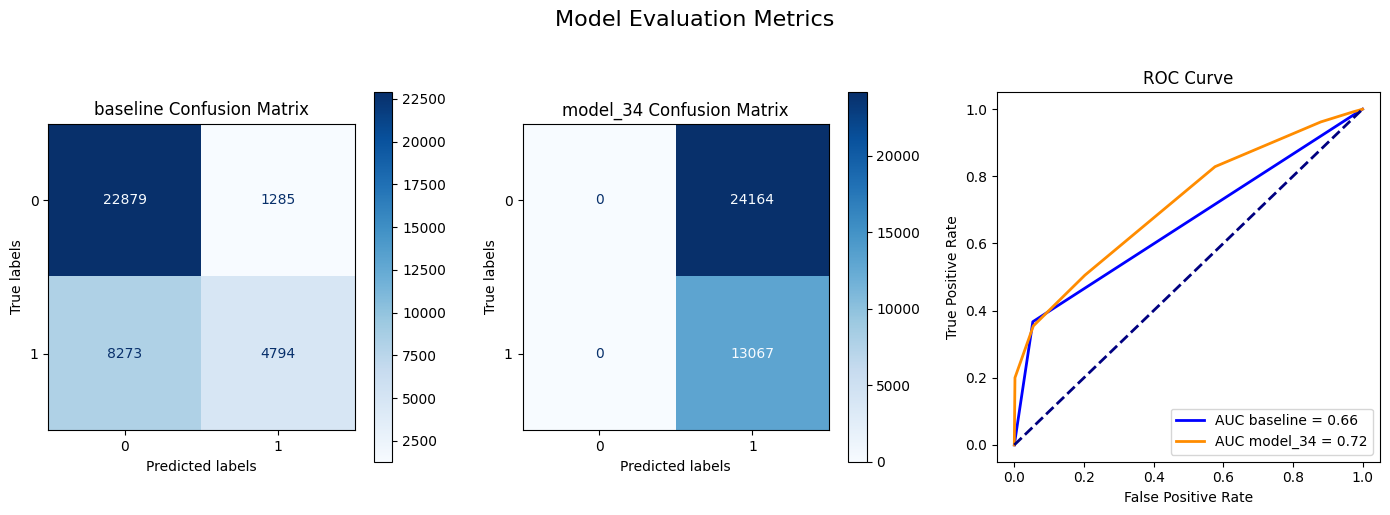

In [9]:
eval.plot_metrics()